In [102]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [103]:
jdt_df = pd.read_csv("matrix_ml_zing2.csv")
#jdt_df['class']=jdt_df['class'].map({'clean':1,'buggy':0})
print(jdt_df.info())
X = jdt_df.iloc[:,0:13]
#print(X.head())
True_val=jdt_df.iloc[:,13]
print(True_val.head())
#Y['class']=Y['class'].map({'clean':1,'buggy':0})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261 entries, 0 to 1861
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LDHH_cbo                             2261 non-null   float64
 1   LDHH_fanIn                           2261 non-null   float64
 2   WCHU_dit                             2261 non-null   float64
 3   WCHU_fanOut                          2261 non-null   float64
 4   WCHU_lcom                            2261 non-null   float64
 5   WCHU_numberOfAttributesInherited     2261 non-null   float64
 6   WCHU_numberOfMethods                 2261 non-null   float64
 7   WCHU_numberOfMethodsInherited        2261 non-null   float64
 8   WCHU_wmc                             2261 non-null   float64
 9   ck_oo_dit                            2261 non-null   int64  
 10  ck_oo_fanOut                         2261 non-null   int64  
 11  numberOfCriticalBugsFoundUntil

In [104]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(True_val)
true_labels[:2261]

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
label_encoder.classes_

array([0, 1], dtype=int64)

In [106]:
n_clusters = len(label_encoder.classes_)

In [107]:
preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

In [108]:
clusterer = Pipeline(
       [
           (
               "kmeans",
               KMeans(
                   n_clusters=n_clusters,
                   init="k-means++",
                   n_init=50,
                   max_iter=500,
                   random_state=42,
               ),
           ),
       ]
    )

In [109]:
pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )

In [110]:
pipe.fit(X)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=2, n_init=50, n_jobs=None,
                                         precomp

In [111]:
preprocessed_data = pipe["preprocessor"].transform(X)

predicted_labels = pipe["clusterer"]["kmeans"].labels_
print(silhouette_score(preprocessed_data, predicted_labels))
print(predicted_labels-true_labels)

0.9071164281083948
[ 0 -1  0 ...  0  0  0]


In [112]:
adjusted_rand_score(true_labels, predicted_labels)

0.06895107041419213

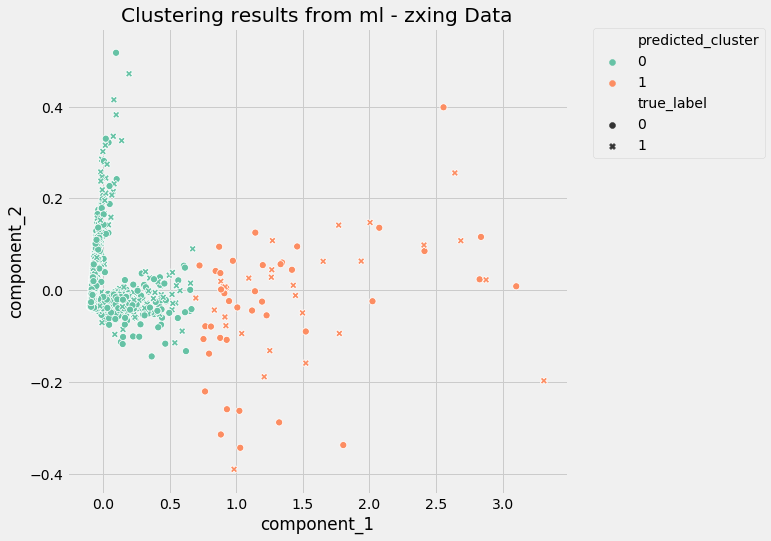

In [113]:
pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(X),
        columns=["component_1", "component_2"],
    )
 
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from ml - zxing Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [117]:
#print(true_labels)
original_clean=0
original_buggy=0
j=0
while j< len(true_labels):
    #print(true_labels[j])
    if true_labels[j].size > 0:
        if true_labels[j]==1:
            original_clean+=1
    j+=1
original_buggy = len(true_labels) - original_clean
print('original_clean ', original_clean)
print('original_buggy ', original_buggy)

original_clean  363
original_buggy  1898


In [118]:
#print(predicted_labels)
predicted_clean=0
predicted_buggy=0
j=0
while j <len(predicted_labels):
    #print(predicted_labels[j])
    if predicted_labels[j].size > 0:
        if predicted_labels[j]==1:
            predicted_clean+=1
    j+=1
predicted_buggy = len(predicted_labels) - predicted_clean
print('predicted_clean ', predicted_clean)
print('predicted_buggy ', predicted_buggy)

predicted_clean  70
predicted_buggy  2191


In [120]:
result=predicted_labels-true_labels
#result=result.flatten()
#print(result[10])
count=0
i=0
#print(len(result))
while i < len(result):
    if result[i]==0:
        count+=1
    i+=1
print('Accuracy ',count/len(result))
i=0
count=0
while i <len(result):
    #print(result[i])
    if result[i]==-1:
        count+=1
    i+=1
print('FN ',count)  

i=0
count=0
while i <len(result):
    #print(result[i])
    if result[i]==1:
        count+=1
    i+=1
print('FP',count) 

i=0
count=0
while i <len(result):
    #print(result[i])
    if predicted_labels[i]==0 & true_labels[i]==0:
        count+=1
    i+=1
print('TP ',count) 
i=0
count=0
while i <len(result):
    #print(result[i])
    if predicted_labels[i]==1 & true_labels[i]==1:
        count+=1
    i+=1
print('TN ',count)  

Accuracy  0.8341441839893853
FN  334
FP 41
TP  2191
TN  29
